In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **OSEMN Pipeline**  


```
O - Obtaining our data
S - Scrubbing / Cleaning our data
E - Exploring / Visualizing our data will allow us to find patterns and trends
M - Modeling our data will give us our predictive power as a wizard
N - Interpreting our data
```



# 1. 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model
from sklearn.linear_model import LogisticRegression

# 2. 데이터 불러오기 및 확인

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/과제테스트/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


공복상태 혹은 음식을 섭취한지 몇시간 후인지 알 수 있었으면 더 좋았을 것 같다



```
Pregnancies : 임신횟수
Glucose : 혈당 (포도당 농도)
BloodPressure : 혈압
SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(nm)
Insulin : 혈청 인슐린(mu U/ml)
BMI : 체질량지수(체중(kg)/(키(m))^2)
DiabetesPedigreeFunction : 당뇨 내력 가중치 값
Age : 나이
Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)
```



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


## 0값 처리  
- Nan
- 평균값
- 중앙값

In [8]:
data['Glucose'].value_counts()[0]

5

In [9]:
# Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [10]:
print(data['Insulin'].value_counts()[0])
data[data['Insulin']==0]

374


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


**혈당이 148, 183 이런 상태에서 Insulin이 0일 수 있나? 근데 당뇨병 환자이긴 하다**   
-> 우선 데이터를 살펴본 후 0값을 어떻게 처리할 지 판단해야겠다.

In [11]:
(data['Insulin'] == 0).mean() # 다소 많긴하다

0.4869791666666667

### 2.2 0값 처리

In [12]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
(data['Insulin'] == 0).mean()

0.0

In [13]:
(data['SkinThickness'] == 0).mean()


0.2955729166666667

In [14]:
data['Glucose'] = data['Glucose'].replace(0,data['Insulin'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['Insulin'].median())

# 3. 데이터 시각화

### 3.1 당뇨병 유무별 feature 분포 살펴보기

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

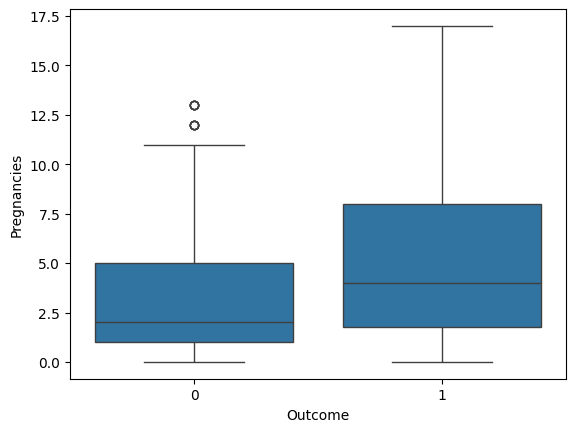

In [15]:
sns.boxplot(x= 'Outcome', y='Pregnancies',data=data )

<Axes: xlabel='Outcome', ylabel='Age'>

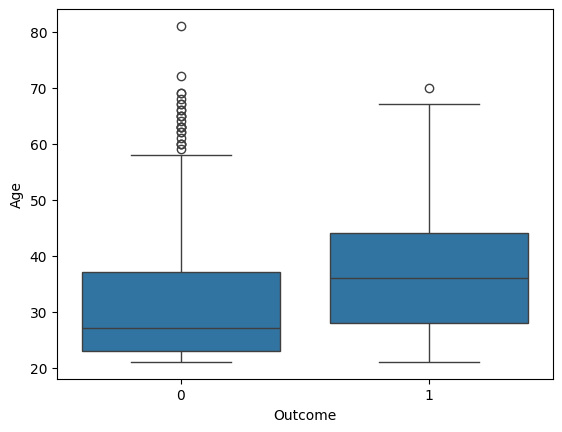

In [16]:
sns.boxplot(x= 'Outcome', y='Age',data=data )


<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

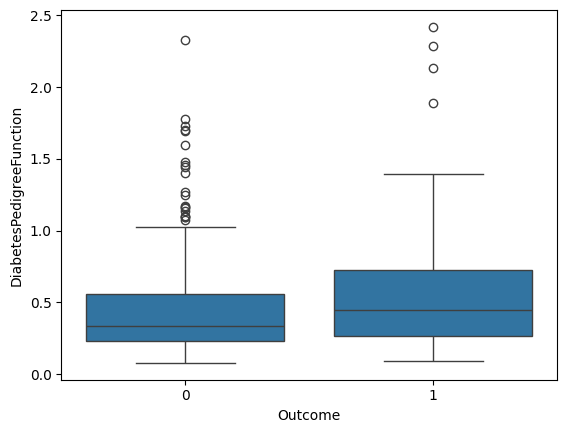

In [17]:
sns.boxplot(x= 'Outcome', y='DiabetesPedigreeFunction',data=data )


<Axes: xlabel='Outcome', ylabel='Glucose'>

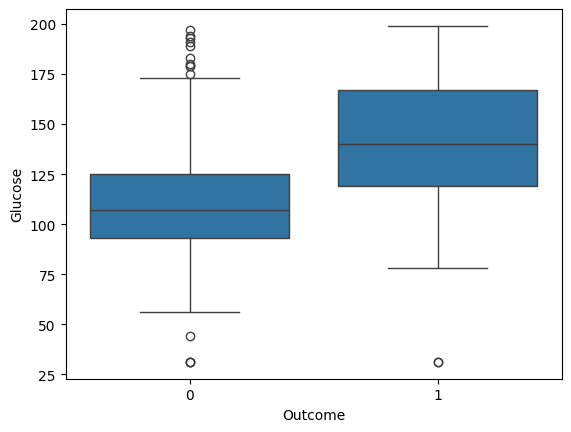

In [18]:
sns.boxplot(x= 'Outcome', y='Glucose',data=data )


<Axes: xlabel='Outcome', ylabel='BMI'>

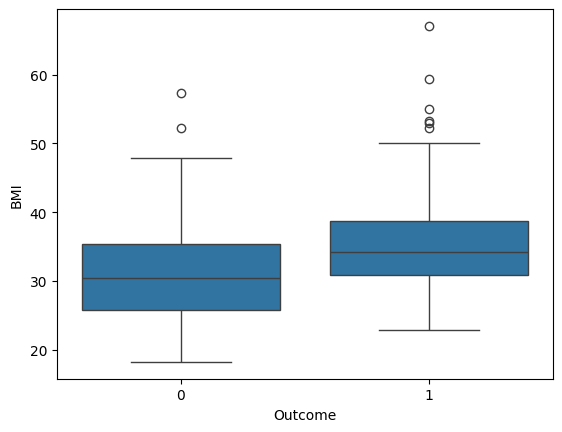

In [19]:
sns.boxplot(x= 'Outcome', y='BMI',data=data )


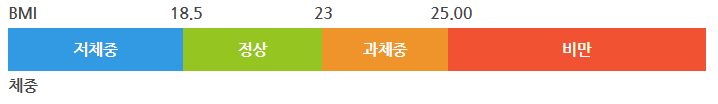

<Axes: xlabel='Outcome', ylabel='Insulin'>

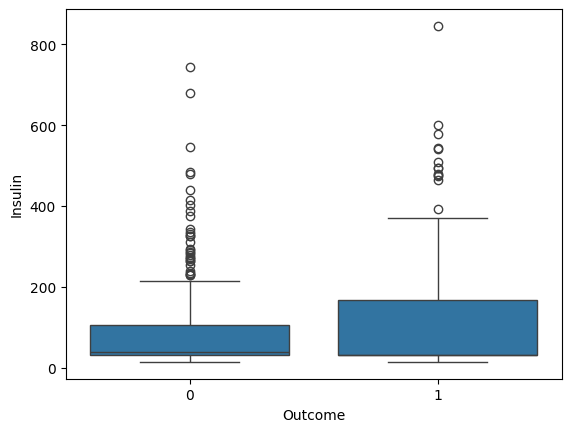

In [20]:
sns.boxplot(x= 'Outcome', y='Insulin',data=data )


**이상치가 심하게 많이 보인다 제거가 필요해보임**

In [21]:
# IQR 사분위 범위로 이상치 제거
q1 = data['Insulin'].quantile(0.25)
q3 = data['Insulin'].quantile(0.75)
iqr = q3-q1

data_iqr = data[(data['Insulin'] < q3 + iqr*1.5) & (data['Insulin'] > q1 - iqr*1.5)]
data_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.00,30.5,26.6,0.351,31,0
2,8,183.0,64.0,31.25,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,31.25,30.5,30.1,0.349,47,1


<Axes: xlabel='Outcome', ylabel='Insulin'>

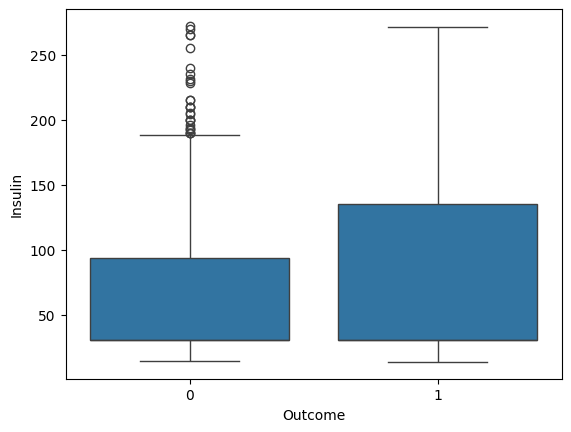

In [22]:
sns.boxplot(x= 'Outcome', y='Insulin',data=data_iqr )


<Axes: xlabel='Outcome', ylabel='SkinThickness'>

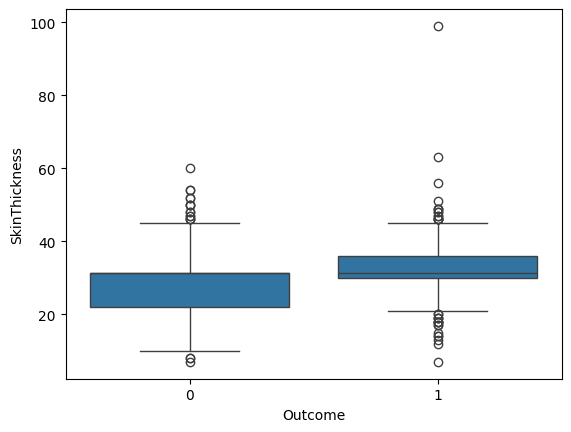

In [23]:
sns.boxplot(x= 'Outcome', y='SkinThickness',data=data )


## 3.1.2 심화

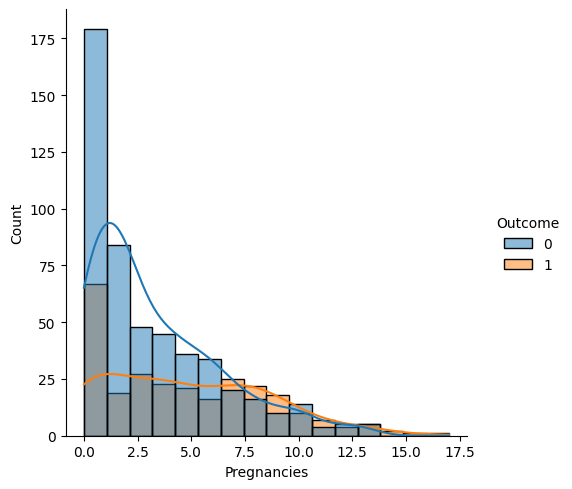

In [24]:
# 임신 횟수 별을 더 자세히 살펴보기 위해 displot 활용

sns.displot(x = data["Pregnancies"],hue=data['Outcome'],kde=True)

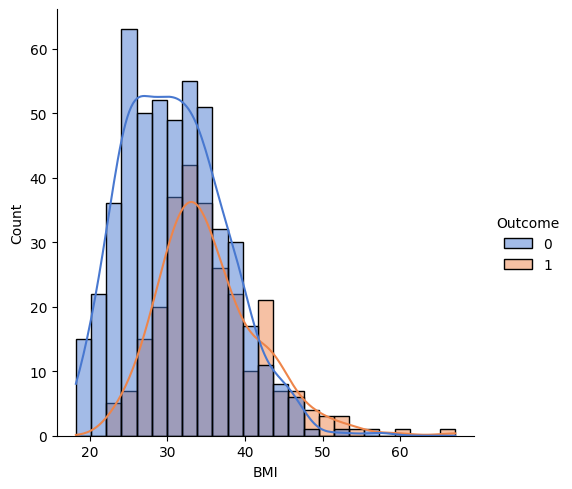

In [25]:
# BMI에 따른 차이를 더 자세히 살펴보기 위해 displot 활용

sns.displot(x = data["BMI"],hue=data['Outcome'],kde=True,palette="muted")


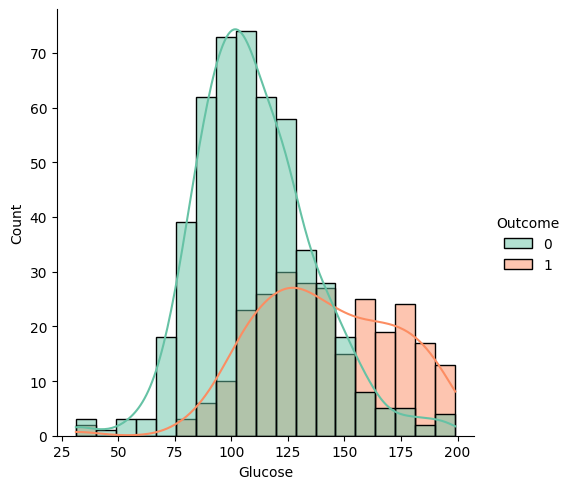

In [26]:
# 정확한 데이터라면 당연히 당뇨병 환자가 높아야 함 -> 역시나 그러함
sns.displot(x = data["Glucose"],hue=data['Outcome'],kde=True,palette="Set2")


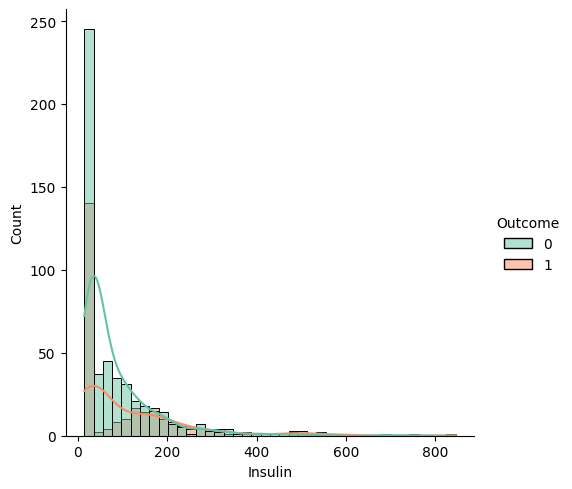

In [27]:
sns.displot(x = data["Insulin"],hue=data['Outcome'],kde=True,palette="Set2")


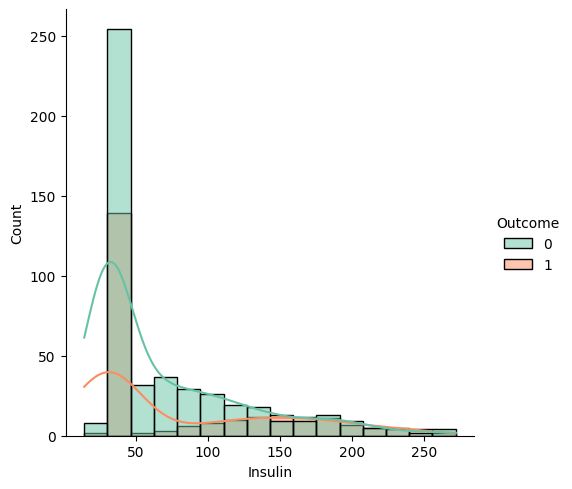

In [28]:
sns.displot(x = data_iqr["Insulin"],hue=data_iqr['Outcome'],kde=True,palette="Set2")


<Axes: xlabel='Glucose', ylabel='Insulin'>

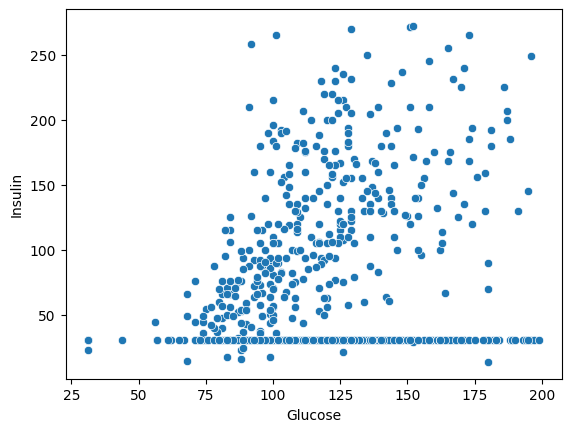

In [29]:
sns.scatterplot(x=data_iqr['Glucose'], y=data_iqr['Insulin'])

<Axes: xlabel='Age', ylabel='Insulin'>

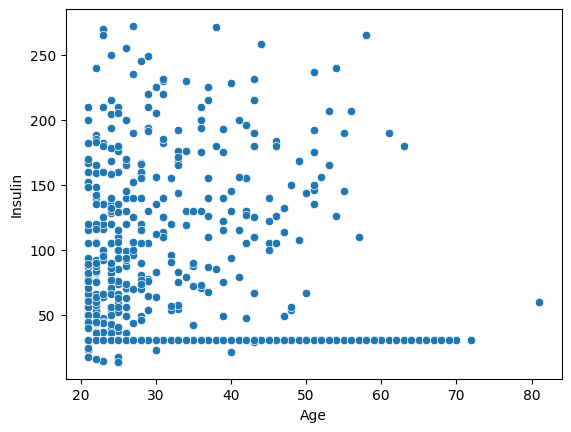

In [30]:
sns.scatterplot(x=data_iqr['Age'], y=data_iqr['Insulin'])


In [31]:
data.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,30.5,33.6,0.627,50
1,1,85.0,66.0,29.00,30.5,26.6,0.351,31
2,8,183.0,64.0,31.25,30.5,23.3,0.672,32
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63
764,2,122.0,70.0,27.00,30.5,36.8,0.340,27
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30
766,1,126.0,60.0,31.25,30.5,30.1,0.349,47


<Axes: >

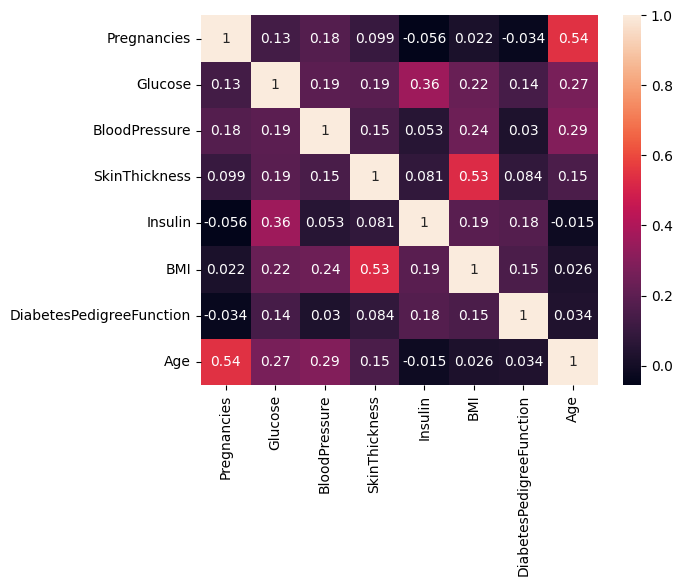

In [32]:
data_feature = data.iloc[:,:-1]
sns.heatmap(data_feature.corr(),annot=True)

약한 상관관계가 보임  
- BMI & SkinThickness
- Age & Pregnancies

# 4. Modeling  
## 4.1 데이터 분리

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1, random_state=42)

y_train = train["Outcome"]
X_train = train.drop("Outcome",axis=1)

y_test = test["Outcome"]
X_test = test.drop("Outcome",axis=1)

In [34]:
X = data.drop("Outcome",axis=1)
y = data["Outcome"]

## 4.2 Modeling  
### 4.2.1 Pipeline & SGD

- cross_val_score() : 전체 X, y를 받으면 내부적으로 K-Fold로 나눠서 훈련(train)과 검증(test)을 자동으로 구분

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([('std_scaler', StandardScaler()),
                     ('sgd_clf',SGDClassifier(random_state=42))
                     ])


In [36]:
from sklearn.model_selection import cross_val_score

# 교차 검증 실행
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("SGD 교차 검증 정확도: ",scores)
print("SGD 평균 정확도: ", scores.mean())

SGD 교차 검증 정확도:  [0.72077922 0.74025974 0.74025974 0.7124183  0.66666667]
SGD 평균 정확도:  0.7160767337237925


### 4.2.2 Logistic Regression

In [37]:
lr = LogisticRegression()

lr_pipeline = Pipeline([('std_scaler', StandardScaler()),
                     ('lr',lr)
                     ])

In [38]:
from sklearn.model_selection import cross_val_score

# 교차 검증 실행
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='accuracy')
print("LR 교차 검증 정확도: ",scores)
print("LR 평균 정확도: ", scores.mean())

LR 교차 검증 정확도:  [0.77922078 0.74675325 0.75974026 0.79084967 0.75816993]
LR 평균 정확도:  0.7669467787114845


### 4.2.3 SVC (SVM)  
- 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류
- 서포트 벡터 : 클래스 사이 경계에 가깝게 위치한 데이터 포인트 (결정 경계와 이들 사이의 거리가 SVC 모델의 dual_coef_에 저장된다.)

In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polykernel_svm_clf = Pipeline([("scaler",StandardScaler()),
                    ("svm_clf", SVC(kernel="poly",degree=3, coef0=1, C=5))])

polykernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [40]:
print("SVM Accuracy of Classifier: ", polykernel_svm_clf.score(X_test,y_test))

SVM Accuracy of Classifier:  0.7532467532467533


### 4.3 Logistic Regression으로 roc_auc curve

In [41]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lr_pipeline, X,y,cv=5)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[438,  62],
       [117, 151]])

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision Score: {precision_score(y,y_pred)}")
print(f"Recall Score: {recall_score(y,y_pred)}")
print(f"F1 Score: {f1_score(y,y_pred)}")

Precision Score: 0.7089201877934272
Recall Score: 0.5634328358208955
F1 Score: 0.6278586278586279


In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

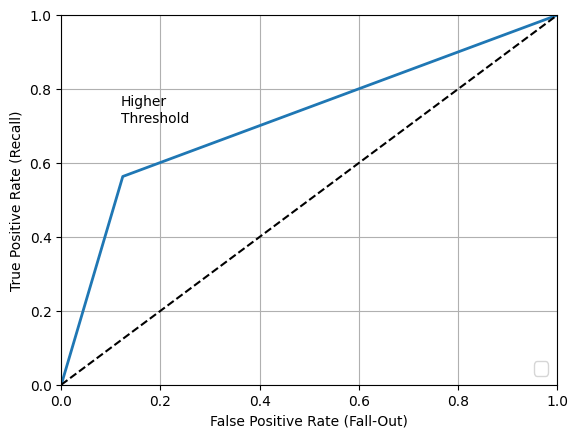

In [45]:
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0,1],[0,1],'k--')
plt.text(0.12, 0.71, "Higher\nThreshold",color="black")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.7197164179104478

### 4.4 RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf_clf, X,y, cv=5,scoring='accuracy')


In [48]:
print("교차 검증 정확도: ",scores)
print("평균 정확도: ", scores.mean())

교차 검증 정확도:  [0.74025974 0.71428571 0.75324675 0.82352941 0.76470588]
평균 정확도:  0.7592055003819709


### 4.4.2 Grid Search

In [51]:
# from sklearn.model_selection import GridSearchCV

# rf_grid = RandomForestClassifier()
# params = {
#     'max_depth':[3,5,7,10],
#     'n_estimators':[100,200,300],
#     'max_features':[3,4,5,6,7,8],
#     'min_samples_leaf':[1,2,4]
# }

# grid = GridSearchCV(rf_grid, params,
#                     cv=10, # 교차검증 : 데이터가 적으므로 10으로 설정
#                     scoring='accuracy',verbose=3)
# model_grid = grid.fit(X,y)

# print('Best Hyperparameters: ', str(model_grid.best_params_))
# print('Best Score: ', str(model_grid.best_score_))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.753 total time=   0.4s
[CV 2/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.740 total time=   0.5s
[CV 3/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.766 total time=   0.6s
[CV 4/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.688 total time=   0.7s
[CV 5/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.675 total time=   0.7s
[CV 6/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.818 total time=   0.7s
[CV 7/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.766 total time=   0.6s
[CV 8/10] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.818 total time=   0.8s
[CV 9/10] END max_depth=3, max_

In [54]:
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(
    max_depth= 5,
    max_features= 7,
    min_samples_leaf= 4,
    n_estimators= 100)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("예측 정확도:{:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도:0.7143
